<a href="https://www.kaggle.com/alperenkaran/spotify-top50-charts-analysis?scriptVersionId=88893676" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1><center>Spotify Top50 Chart Analysis</center></h1>

<h1><center><img src="https://developer.spotify.com/assets/branding-guidelines/logo@2x.png" alt="Spotify" style="width: 800px;"/></center></h1>

In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def visualize_word_counts(counts):
    wc = WordCloud(max_font_size=130, min_font_size=25, colormap='tab20', background_color='white', 
                   prefer_horizontal=.95, width=2100, height=700, random_state=0)
    cloud = wc.generate_from_frequencies(counts)
    plt.figure(figsize=(18,15))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Read the csv file, and get the Top50 lists for each day

In [3]:
usecols = ['title','rank','date','artist','region','chart','streams']  # columns that we will read from the csv
charts = pd.read_csv('../input/spotify-charts/charts.csv', usecols=usecols)  # read the csv file
top50 = charts[(charts['chart'] == 'top200') & (charts['rank'] <= 50)]  # get the top50
top50 = top50.drop(['chart'], axis=1).reset_index(drop=True)  # we don't need the chart column anymore
top50

,title,rank,date,artist,region,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,Argentina,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,Argentina,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,Argentina,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",Argentina,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,Argentina,153956.0
...,...,...,...,...,...,...
5477663,Explícale (feat. Bad Bunny),46,2018-01-31,Yandel,Uruguay,4560.0
5477664,Nena Maldicion (feat. Lenny Tavarez),47,2018-01-31,"Paulo Londra, Lenny Tavárez",Uruguay,4406.0
5477665,Ahora Dice,48,2018-01-31,"Chris Jedi, J Balvin, Ozuna, Arcangel",Uruguay,4316.0
5477666,La fórmula (feat. Chris Jedi),49,2018-01-31,"De La Ghetto, Daddy Yankee, Ozuna",Uruguay,4272.0


# A visualization of artist popularity

WordCloud is a good option to visualize artist popularity. 

We first create a dictionary `counts` which counts how many times an artist appear in the `top50` dataframe. 

Then, we visualize this dictionary using WordCloud.

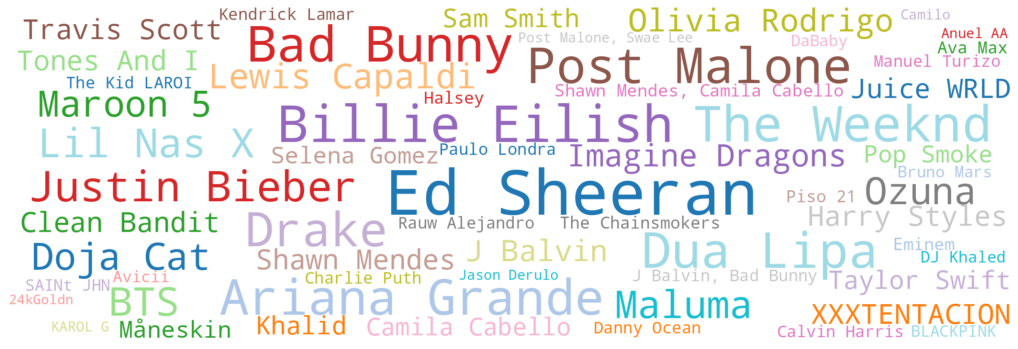

In [4]:
counts = top50['artist'].value_counts()
visualize_word_counts(counts)

# How many days does a song stay in Global Top50 ?

Some songs appear in the Global Top50 for a few days, but some hit songs are there like ... forever.

For example, I remember Ed Sheeran's **Shape of You** was always in the Global Top50 list.

In [5]:
# we create a dataframe called n_days with columns: 'artist', 'title', 'Number of days in Global Top50'
top50_global = top50[top50['region'] == 'Global']
n_days = top50_global.groupby(['artist', 'title'])['date'].count().reset_index()
n_days.columns = ['artist', 'title', 'Number of days in Global Top50']

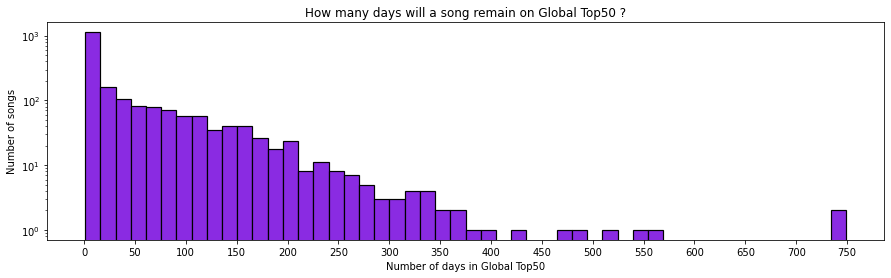

In [6]:
plt.figure(figsize=(15,4))
plt.hist(n_days['Number of days in Global Top50'], bins=50, color ='blueviolet', edgecolor='black', linewidth=1.2)
plt.yscale('log')
plt.title('How many days will a song remain on Global Top50 ?')
plt.xlabel('Number of days in Global Top50')
plt.ylabel('Number of songs')
plt.locator_params(axis='x', nbins=25)  # more ticks on x-axis
plt.show()

As we expected most songs were there just about one or two months (notice the logscale on the y-axis).

There are some songs which were on Global Top50 for over **two years**! Which songs were they? Can you guess?

In [7]:
n_days.sort_values(by='Number of days in Global Top50', ascending=False)

,artist,title,Number of days in Global Top50
1821,The Weeknd,Blinding Lights,749
1144,Lewis Capaldi,Someone You Loved,744
1852,Tones And I,Dance Monkey,559
781,Harry Styles,Watermelon Sugar,540
665,Ed Sheeran,Shape of You,510
...,...,...,...
1702,Taylor Swift,Come Back...Be Here (Taylor's Version),1
1012,Kanye West,Junya pt 2,1
1700,Taylor Swift,Breathe (feat. Colbie Caillat) (Taylor’s Version),1
1021,Kanye West,Ok Ok pt 2,1


# Streams by region

Which region's Top50 list is streamed the most? The result will be somewhat related to the region's population, but not directly. 

For example, it is likely that US Top50 list is streamed by listeners all over the world, not only by US citizens.

In [8]:
# compute total streams by region
streams = top50.groupby('region')['streams'].sum().reset_index()

# compute percent stream
streams['percent_streams'] = streams['streams']/streams['streams'].sum()

# rename regions with very little streams (< .01 %) as 'Other'
streams['region'] = streams.apply(lambda x: x['region'] if x['percent_streams'] >= .01 else 'Other', axis=1)

# we need another groupby because there are multiple regions with name 'Other'
streams = streams.groupby('region')['percent_streams'].sum().reset_index().round(3).sort_values(by='percent_streams')

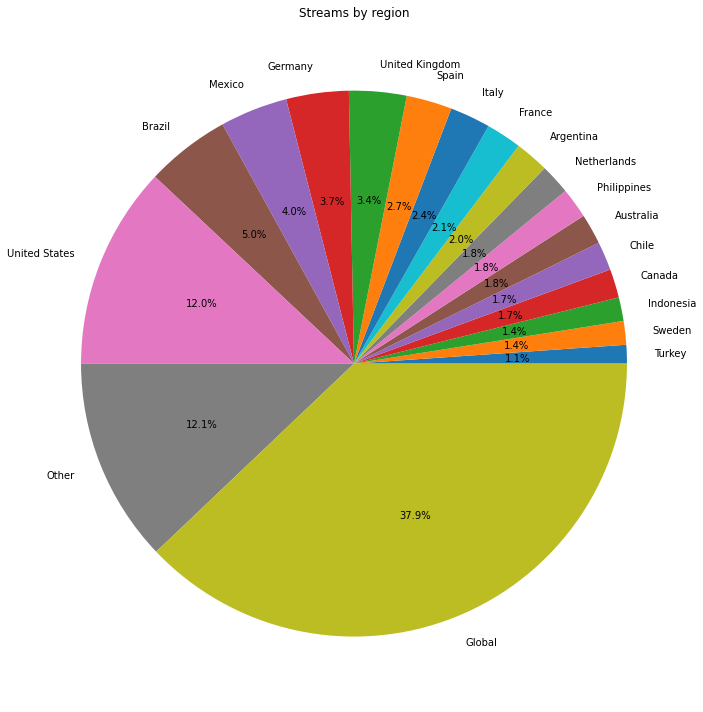

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(x=streams['percent_streams'], labels=streams['region'], autopct='%.1f%%')
ax.set_title('Streams by region')
plt.tight_layout()

# Is rank related to number of streams?

We expect that whenever rank is small number (like 1st rank) the number of streams will be high. So, they must be inversely correlated.

Let's look at it day by day in the Global Top50.

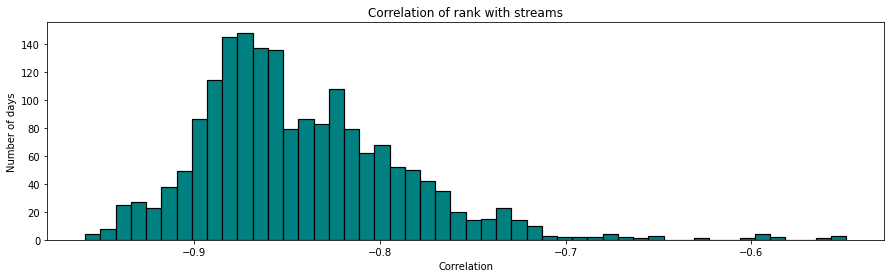

In [10]:
correlations = [df['streams'].corr(df['rank']) for date, df in top50_global.groupby('date')]

plt.figure(figsize=(15,4))
plt.hist(correlations, bins=50, color ='teal', edgecolor='black', linewidth=1.2)
plt.xlabel('Correlation')
plt.ylabel('Number of days')
plt.title('Correlation of rank with streams')
plt.show()

The histogram shows that on most days, the rank and the number of streams are highly negatively correlated. For only a few days, they were moderately negatively correlated.

# Does the rank of a song change over time?

Consider the song **Blinding Lights** which stayed in Global Top50 for the longest time. We wonder how the rank of the song changed over time.

In [11]:
blinding_lights = top50_global[top50_global['title'] == 'Blinding Lights'].sort_values(by='date').reset_index(drop=True)
blinding_lights

,title,rank,date,artist,region,streams
0,Blinding Lights,8,2019-11-29,The Weeknd,Global,3479390.0
1,Blinding Lights,9,2019-11-30,The Weeknd,Global,3491128.0
2,Blinding Lights,10,2019-12-01,The Weeknd,Global,3113106.0
3,Blinding Lights,7,2019-12-02,The Weeknd,Global,3571943.0
4,Blinding Lights,8,2019-12-03,The Weeknd,Global,3497573.0
...,...,...,...,...,...,...
744,Blinding Lights,40,2021-12-15,The Weeknd,Global,1790179.0
745,Blinding Lights,41,2021-12-16,The Weeknd,Global,1795966.0
746,Blinding Lights,42,2021-12-17,The Weeknd,Global,1887564.0
747,Blinding Lights,48,2021-12-18,The Weeknd,Global,1858273.0


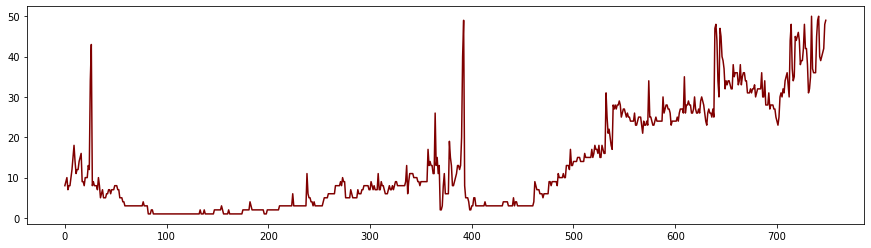

In [12]:
plt.figure(figsize=(15,4))
plt.plot(blinding_lights['rank'], color='maroon')
plt.show()

At about 450 days, the song's rank started dropping.

But this plot looks kinda messy, doesn't it? Perhaps we could look at moving monthly averages for rank, instead of daily rankings.

Computing a moving mean is very easy with pandas, just use the **rolling** method!

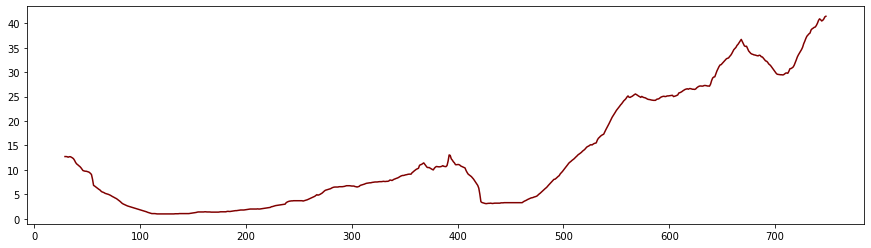

In [13]:
plt.figure(figsize=(15,4))
plt.plot(blinding_lights['rank'].rolling(30).mean(), color='maroon')
plt.show()